In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os

In [2]:
# df_char = pd.read_csv("C:\\Users\\gnchu\\Downloads\\cleaned data\\cleaned_characters(1).csv")
# df_sex = pd.read_csv("C:\\Users\\gnchu\\Downloads\\cleaned data\\cleaned_sexualization.csv")
# '/home/simonet/CFG_Project_G4/CFG_Degree_Project_Group_4/notebooks/archive/cleaned_characters.csv

In [3]:
df_char = pd.read_csv('cleaned_characters.csv')
df_char

,Name,Gender,Game,Age_range,Playable,Sexualization_total,Id,Species,Alliance,Function,Romantic_Interest
0,Farah,Female,CODMW,Adult,1,0,CODMW_Farah,Human,Protagonist,PA,0
1,Protagonist,Custom,PSS,Teenager,1,0,PSS_Protagonist,Human,Protagonist,PA,0
2,Magnolia,Female,PSS,Elderly,0,0,PSS_Magnolia,Human,Protagonist,SC,0
3,Sonia,Female,PSS,Adult,0,0,PSS_Sonia,Human,Protagonist,SC,0
4,Marnie,Female,PSS,Teenager,0,0,PSS_Marnie,Human,Both,MC,0
...,...,...,...,...,...,...,...,...,...,...,...
632,Beni,Male,KBOS,Infant,0,0,KBOS_Beni,Human,Protagonist,SC,0
633,Taro,Male,KBOS,Child,0,0,KBOS_Taro,Human,Protagonist,SC,0
634,Rusu,Male,KBOS,Adult,0,0,KBOS_Rusu,Human,Protagonist,SC,0
635,Adira,Female,KBOS,Adult,0,0,KBOS_Adira,Human,Protagonist,SC,0


In [4]:
df_sex = pd.read_csv("cleaned_sexualization.csv")
df_sex

,character_id,Sexualized_clothing,Trophy,Damsel in Distress,Sexualized Cutscenes,Total
0,CODMW_Farah,0,0,0,0,0
1,PSS_Protagonist,0,0,0,0,0
2,PSS_Magnolia,0,0,0,0,0
3,PSS_Sonia,0,0,0,0,0
4,PSS_Marnie,0,0,0,0,0
...,...,...,...,...,...,...
632,KBOS_Beni,0,0,0,0,0
633,KBOS_Taro,0,0,0,0,0
634,KBOS_Rusu,0,0,0,0,0
635,KBOS_Adira,0,0,0,0,0


In [5]:
f"Character data (row, columns): {df_char.shape} and Sexualization data (row,columns): df_sex.shape"

'Character data (row, columns): (637, 11) and Sexualization data (row,columns): df_sex.shape'

In [6]:
df_sex.dtypes

character_id            object
Sexualized_clothing      int64
Trophy                   int64
Damsel in Distress       int64
Sexualized Cutscenes     int64
Total                    int64
dtype: object

In [7]:
df_char.dtypes

Name                   object
Gender                 object
Game                   object
Age_range              object
Playable                int64
Sexualization_total     int64
Id                     object
Species                object
Alliance               object
Function               object
Romantic_Interest       int64
dtype: object

In [8]:
df_sex.describe()

,Sexualized_clothing,Trophy,Damsel in Distress,Sexualized Cutscenes,Total
count,637.000000,637.000000,637.000000,637.000000,637.000000
mean,0.029827,0.010989,0.028257,0.017268,0.086342
std,0.170244,0.104333,0.165838,0.130372,0.389022
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,3.000000


## The key insights gained from describe() function being:
* The averages are low, with a wide spread from the mean/average
* The standard deviation is fairly wide meaning there is a large spread amongst characters
* Low instance of sexualization, but a wide variation within characters for sexualization categories.
* Of the four categories for sexualization, no character is classed as meeting all four criteria, with three being the maximum.


In [9]:
df_char.describe()

,Playable,Sexualization_total,Romantic_Interest
count,637.000000,637.000000,637.000000
mean,0.193093,0.086342,0.124019
std,0.395035,0.389022,0.454195
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,3.000000,2.000000


* There is a playable mean of 0.19.
* There is a sexualization mean of 0.86.
* What can we get from standard deviation?

Insight: 
* The split between male and female is almost half, which is refreshing to see, although the data set could be made larger with more recent data, it may be indicative of increase interest amongst non-males in gaming.
* There is a significant unrepresentation of non-binary characters, this may be due to concepts such as non-binary being culturally salient in certain cultures only. Game developers/ designers may not conceive of non- binary terms around gender in the same manner.


In [10]:
df_char.head(5)

,Name,Gender,Game,Age_range,Playable,Sexualization_total,Id,Species,Alliance,Function,Romantic_Interest
0,Farah,Female,CODMW,Adult,1,0,CODMW_Farah,Human,Protagonist,PA,0
1,Protagonist,Custom,PSS,Teenager,1,0,PSS_Protagonist,Human,Protagonist,PA,0
2,Magnolia,Female,PSS,Elderly,0,0,PSS_Magnolia,Human,Protagonist,SC,0
3,Sonia,Female,PSS,Adult,0,0,PSS_Sonia,Human,Protagonist,SC,0
4,Marnie,Female,PSS,Teenager,0,0,PSS_Marnie,Human,Both,MC,0


I don't agree with zelda as no trophy, also she's kidnapped

In [11]:
df_sex.head(5)

,character_id,Sexualized_clothing,Trophy,Damsel in Distress,Sexualized Cutscenes,Total
0,CODMW_Farah,0,0,0,0,0
1,PSS_Protagonist,0,0,0,0,0
2,PSS_Magnolia,0,0,0,0,0
3,PSS_Sonia,0,0,0,0,0
4,PSS_Marnie,0,0,0,0,0


In [12]:
df_char['Gender'].value_counts()

Gender
Male          393
Female        203
Non-binary     33
Custom          8
Name: count, dtype: int64

In [13]:
gender_percent = df_char['Gender'].value_counts(normalize = True)

full_percent = round(gender_percent * 100,2).astype(float)

full_percent_formatted = full_percent.apply(lambda x: f"{x:}%") # lambda explain

full_percent_formatted

Gender
Male           61.7%
Female        31.87%
Non-binary     5.18%
Custom         1.26%
Name: proportion, dtype: object

<Axes: xlabel='Gender'>

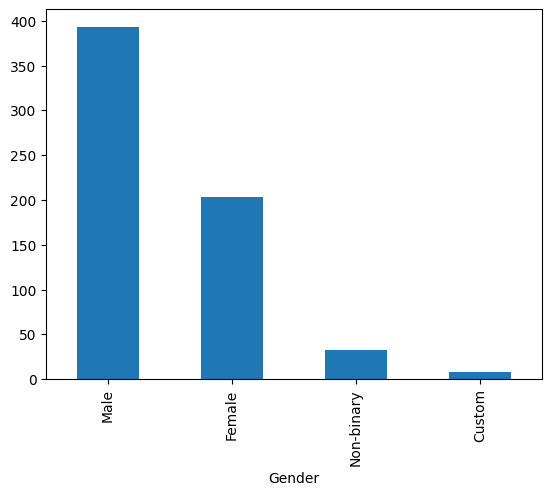

In [14]:
df_char['Gender'].value_counts().plot(kind='bar')

### What are the trends, if any, when gender percentage is split by age range?

In [15]:
gender_age = df_char[['Gender', 'Age_range']]
gender_age.head(3)

,Gender,Age_range
0,Female,Adult
1,Custom,Teenager
2,Female,Elderly


In [16]:
gender_age = df_char[['Gender', 'Age_range']].value_counts(normalize = True)

gender_age_percent = round(gender_age * 100,2).astype(float)

gender_age_pc_format = gender_age_percent.apply(lambda x: f"{x:}%")

gender_age_pc_format

Gender      Age_range  
Male        Adult          27.79%
Female      Adult          12.87%
Male        Unknown        11.15%
            Middle-aged     7.69%
Female      Unknown         5.65%
            Young adult     4.71%
Male        Young adult     4.55%
Non-binary  Unknown          4.4%
Male        Child           3.92%
Female      Teenager        3.77%
Male        Elderly         3.45%
            Teenager        2.83%
Female      Middle-aged     2.04%
            Child           1.57%
            Elderly          1.1%
Custom      Adult           0.63%
Male        Infant          0.31%
Custom      Teenager        0.31%
Non-binary  Teenager        0.31%
Custom      Child           0.16%
Female      Infant          0.16%
Custom      Unknown         0.16%
Non-binary  Adult           0.16%
            Child           0.16%
            Middle-aged     0.16%
Name: proportion, dtype: object

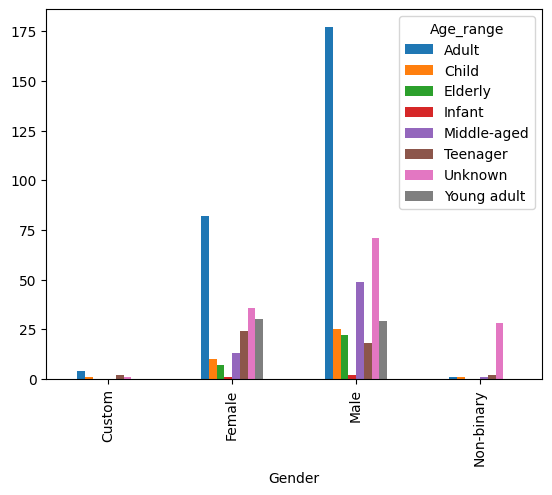

<Figure size 2000x1000 with 0 Axes>

In [60]:
gender_age_bar = df_char[['Gender','Age_range']].value_counts().unstack()
gender_age_bar.plot(kind='bar')
plt.figure(figsize=(20, 10))
plt.show()

### Is a character more/less likely to be a playable character depending on their assigned gender?

In [18]:
df_char.columns

Index(['Name', 'Gender', 'Game', 'Age_range', 'Playable',
       'Sexualization_total', 'Id', 'Species', 'Alliance', 'Function',
       'Romantic_Interest'],
      dtype='object')

In [19]:
playable_gen = df_char[['Gender', 'Playable']].value_counts(normalize= True)

playable_gen = round(playable_gen * 100,2).astype(float)

playable_gen = playable_gen.apply(lambda x: f"{x:}%")

playable_gen

Gender      Playable
Male        0           50.39%
Female      0           26.69%
Male        1            11.3%
Female      1            5.18%
Non-binary  0            3.61%
            1            1.57%
Custom      1            1.26%
Name: proportion, dtype: object

<Axes: xlabel='Gender'>

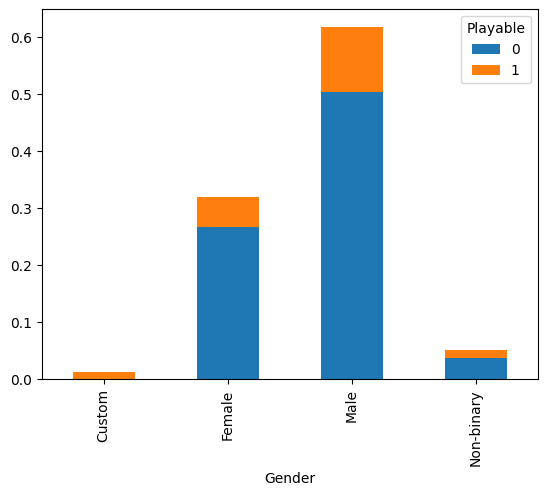

In [20]:
playable_gen = df_char[['Gender', 'Playable']].value_counts(normalize= True)
playable_gen_df = playable_gen.unstack()
playable_gen_df.plot(kind='bar', stacked=True)



### Initially it was interesting that 50 % of males are non playable, just over 26% of females are non-playable, 11% of  males are playable, 
### 5% of females are playable (just under 50% comparatively), only 1.57% of non-binary characters in this dataset are playable.


In [21]:
play_gen_func = df_char[['Gender', 'Playable', 'Function']].value_counts(normalize=True)

play_gen_func = round(play_gen_func * 100,2).astype(float)

play_gen_func

Gender      Playable  Function
Male        0         SC          26.06
                      MC          16.48
Female      0         SC          12.72
                      MC          10.68
Male        1         PA           7.06
            0         MA           5.97
Female      1         PA           2.51
Male        1         MC           2.35
Female      0         MA           1.57
            1         MC           1.57
Non-binary  1         PA           1.41
            0         SC           1.26
Custom      1         PA           1.26
Male        0         DA           1.10
            1         SC           1.10
Female      0         DA           0.94
Male        0         SK           0.78
Non-binary  0         SK           0.78
Female      0         SK           0.78
Non-binary  0         MA           0.63
                      MC           0.63
Male        1         DA           0.47
Female      1         SC           0.47
Male        1         SK           0.31
Non-binar

### Is there a general pattern in sexualization when we organise characters by gender? Is there a common pattern in those scoring high ( 2 - 3) for ‘sexualization_total’?

In [22]:
trend_sex_min = df_char[['Gender', 'Sexualization_total']].min() #custom, sexualization 0

trend_sex_mode = df_char[['Gender', 'Sexualization_total']].mode() #male, sexualization total 0

trend_sex_max = df_char[['Gender', 'Sexualization_total']].max() #non-binary sexualization total 3

trend_sex_min, trend_sex_mode, trend_sex_max

(Gender                 Custom
 Sexualization_total         0
 dtype: object,
   Gender  Sexualization_total
 0   Male                    0,
 Gender                 Non-binary
 Sexualization_total             3
 dtype: object)

In [23]:
#Only those meeting half of sexualization total 
sex_over_2 = df_char[df_char['Sexualization_total'] >= 2]
sex_over_2

,Name,Gender,Game,Age_range,Playable,Sexualization_total,Id,Species,Alliance,Function,Romantic_Interest
6,Peach,Female,SMO,Adult,0,2,SMO_Peach,Human,Protagonist,MC,1
9,Ciri,Female,TW3,Young adult,0,2,TW3_Ciri,Human,Protagonist,DA,0
17,Amanda,Female,GTAV,Middle-aged,0,3,GTAV_Amanda,Human,Both,SC,1
18,Tracy,Female,GTAV,Young adult,0,3,GTAV_Tracy,Human,Both,SC,0
26,Tiara,Female,SMO,Unknown,0,2,SMO_Tiara,Animated Object,Protagonist,SC,0
33,Yennefer,Female,TW3,Adult,0,2,TW3_Yennefer,Human,Protagonist,MC,1
34,Triss,Female,TW3,Adult,0,2,TW3_Triss,Human,Protagonist,SC,2
35,Keira Metz,Female,TW3,Adult,0,2,TW3_Keira,Human,Protagonist,SC,2
112,Geralt,Male,TW3,Adult,1,2,TW3_Geralt,Human,Protagonist,PA,0
214,Girlfriend,Female,HLM,Adult,0,2,HLM_Girlfriend,Human,Protagonist,SC,1


In [52]:
gensex_over2_split = df_char[['Gender','Sexualization_total']].value_counts()
gensex_over2_split

Gender      Sexualization_total
Male        0                      388
Female      0                      174
Non-binary  0                       32
Female      1                       13
            2                       13
Custom      0                        8
Male        1                        4
Female      3                        3
Male        2                        1
Non-binary  1                        1
Name: count, dtype: int64

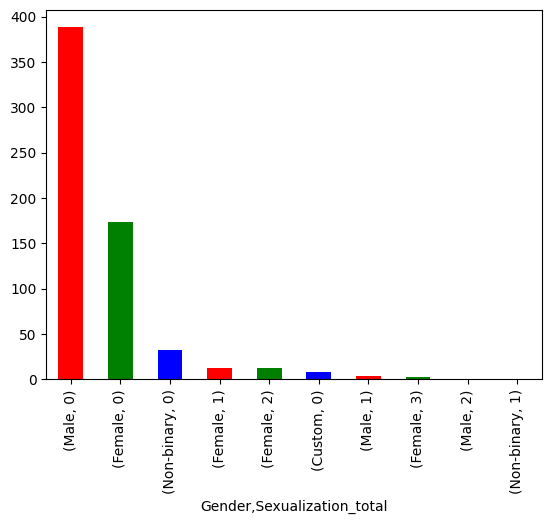

In [63]:
gensex_over2_split.plot(kind='bar', color=['r', 'g', 'b']) # Simone to google how to add labels inside graph

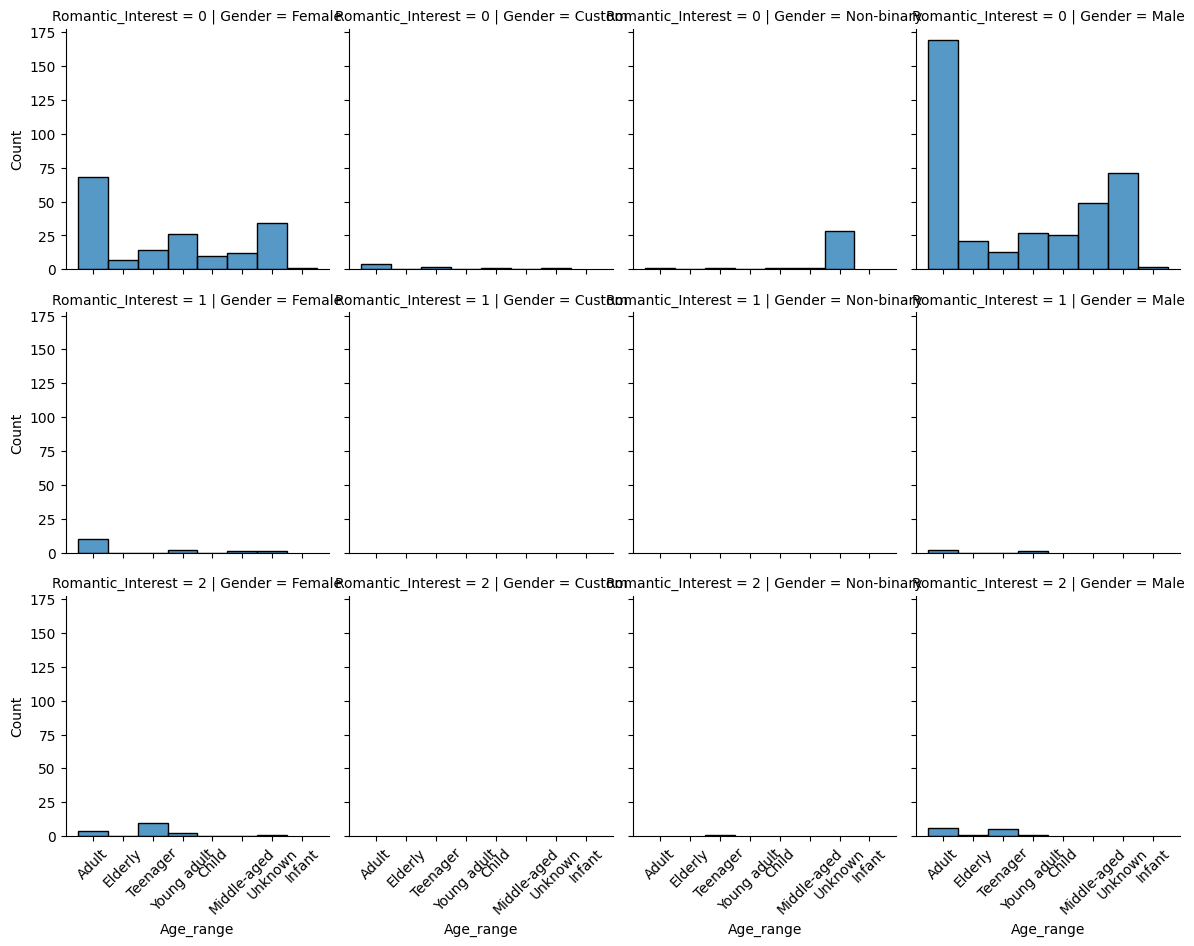

In [41]:
#sns plot for romantic interest, by gender and age
g = sns.FacetGrid(df_char, col ='Gender', row="Romantic_Interest")
g.map(sns.histplot, 'Age_range')
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45) # for loop to rotate x axis by 45 degrees - more readable
plt.show()

## Non-binary character focus
* How many games did these come from
* Which games contain non-binary characters and year of game release?
* What species are these non-binary characters - more likely to be humanoid/non human explicitly?


In [25]:
#data regarding non-binary to be merged with games.csv to determine the countries these games are from:
df_non_b = df_char[df_char['Gender'] == 'Non-binary'][['Gender', 'Game']]
print(df_non_b)

         Gender    Game
11   Non-binary      UT
16   Non-binary     JRN
56   Non-binary      UT
207  Non-binary     BSI
222  Non-binary     JRN
223  Non-binary     JRN
224  Non-binary     JRN
257  Non-binary      TN
258  Non-binary      TN
263  Non-binary      ER
267  Non-binary      ER
283  Non-binary      NW
308  Non-binary     NRA
325  Non-binary   IWATE
339  Non-binary   IWATE
346  Non-binary     IMM
347  Non-binary     IMM
371  Non-binary    CACW
396  Non-binary    OAWW
399  Non-binary    OAWW
432  Non-binary  TINGWD
456  Non-binary    OABF
460  Non-binary    OABF
502  Non-binary     CLS
503  Non-binary      DC
508  Non-binary    HLKN
512  Non-binary    HLKN
529  Non-binary    NITW
532  Non-binary    NITW
569  Non-binary    MGSV
571  Non-binary    TSWP
599  Non-binary   TBOIR
628  Non-binary    KBOS


Merging character and sexualization tables, when grouped by gender, what can we learn about designers clothing choices for characters? Which (if any) gender is most likely to wear sexualized clothing?
Joining gender-sex_cloths and then doing a sum 

In [26]:
df_sex.rename(columns={'character_id': 'Id'}, inplace=True)
print(df_Char.columns)
print(df_sex.columns)


NameError: name 'df_Char' is not defined

# Merging character and sexualization tables, when grouped by gender, what can we learn about designers clothing choices for characters? Which (if any) gender is most likely to wear sexualized clothing?

### Doing % of this data could be interesting

In [ ]:
df_merged = pd.merge(df_Char, df_sex, on='Id')

# Calcular el promedio de puntuaciones de ropa sexualizada por género
clothing_sexualization_by_gender = df_merged.groupby('Gender')['Sexualized_clothing'].sum()
print(clothing_sexualization_by_gender)

We have 393 males characters and only 2 of those have been sexualized clothes.
In other hand we have 203 female characters we have a total of 17 who have sexualized clothes.

Through the years which year had the most sexualized clothing? 

In [ ]:
# print(df_Char.columns)
# print(df_sex.columns)

# df_1Q = df_Char[['Gender', 'Age_range']]
# df_1Q
# df_index_1Q = df_Char.set_index('Gender', inplace = True)
df_Char
